In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Customer data/BankCustomerData.csv')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Customer
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42634,21,student,single,secondary,no,2488,no,no,telephone,12,jan,661,2,92,1,success,yes
42635,87,retired,married,primary,no,2190,no,no,telephone,12,jan,512,2,-1,0,unknown,yes
42636,34,blue-collar,married,primary,no,6718,no,no,cellular,13,jan,278,4,97,1,other,no
42637,22,student,single,secondary,no,254,no,no,cellular,13,jan,143,2,-1,0,unknown,yes


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data.shape

(42639, 17)

In [ ]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Customer     0
dtype: int64

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42639 entries, 0 to 42638
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        42639 non-null  int64 
 1   job        42639 non-null  object
 2   marital    42639 non-null  object
 3   education  42639 non-null  object
 4   default    42639 non-null  object
 5   balance    42639 non-null  int64 
 6   housing    42639 non-null  object
 7   loan       42639 non-null  object
 8   contact    42639 non-null  object
 9   day        42639 non-null  int64 
 10  month      42639 non-null  object
 11  duration   42639 non-null  int64 
 12  campaign   42639 non-null  int64 
 13  pdays      42639 non-null  int64 
 14  previous   42639 non-null  int64 
 15  poutcome   42639 non-null  object
 16  Customer   42639 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.5+ MB


In [ ]:
df = data.copy()

Text(0.5, 1.0, 'Education type vs Count')

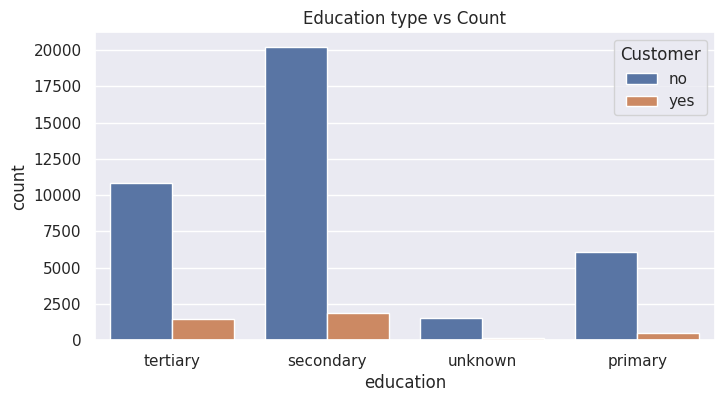

In [ ]:
sns.countplot(x="education",data=df, hue = "Customer")
plt.title("Education type vs Count")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'management'),
  Text(1, 0, 'technician'),
  Text(2, 0, 'entrepreneur'),
  Text(3, 0, 'blue-collar'),
  Text(4, 0, 'unknown'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'admin.'),
  Text(7, 0, 'services'),
  Text(8, 0, 'self-employed'),
  Text(9, 0, 'unemployed'),
  Text(10, 0, 'housemaid'),
  Text(11, 0, 'student')])

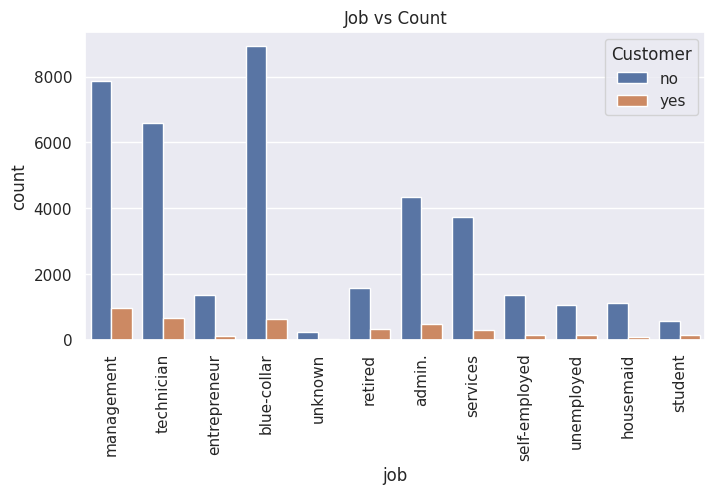

In [ ]:
sns.countplot(x="job", data = df, hue ="Customer")
plt.title("Job vs Count")
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Martial Status vs Count')

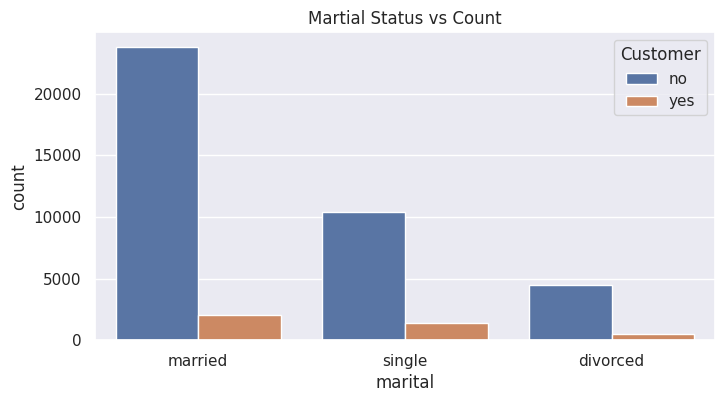

In [ ]:
sns.countplot(x="marital", data = df,hue ="Customer")
plt.title("Martial Status vs Count")

Text(0.5, 1.0, 'personal loan vs Count')

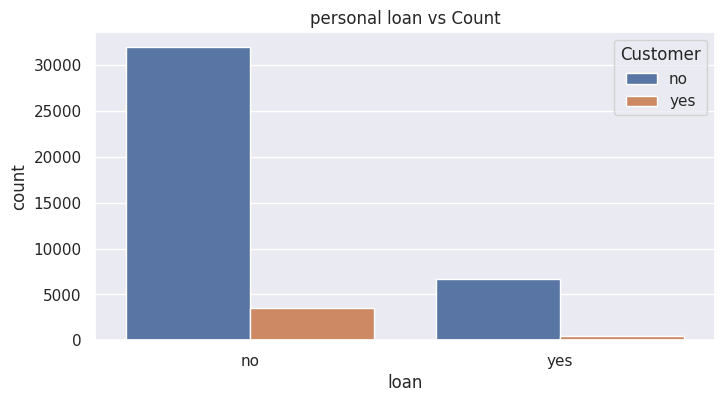

In [ ]:
sns.countplot(x="loan", data = df, hue ="Customer")
plt.title("personal loan vs Count")

<ipython-input-525-c372cba786d5>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])
<ipython-input-525-c372cba786d5>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['balance'])
<ipython-input-525-c372cba786d5>:8: UserWarning: 

`distplot` is a deprecated function and will be removed

<Axes: xlabel='previous', ylabel='Density'>

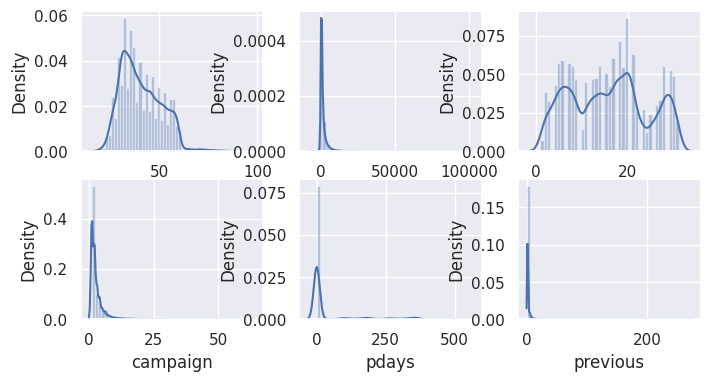

In [ ]:
from pylab import *
sns.set(rc={"figure.figsize": (8, 4)}); np.random.seed(0)
subplot(2,3,1)
sns.distplot(df['age'])
subplot(2,3,2)
sns.distplot(df['balance'])
subplot(2,3,3)
sns.distplot(df['day'])
subplot(2,3,4)
sns.distplot(df['campaign'])
subplot(2,3,5)
sns.distplot(df['pdays'])
subplot(2,3,6)
sns.distplot(df['previous'])

<Axes: >

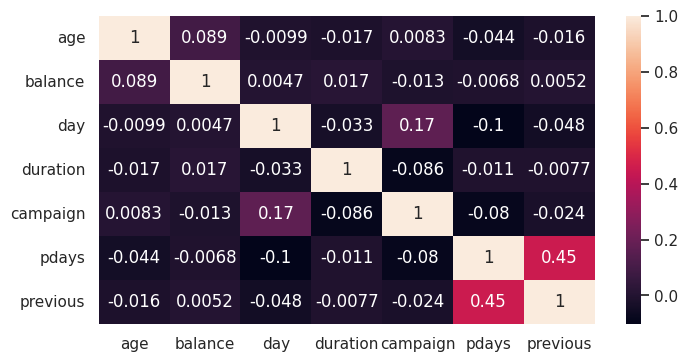

In [ ]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot =True)

In [ ]:
df = pd.concat([df], ignore_index=True)
df.shape

(42639, 17)

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Customer
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df = pd.get_dummies(df,columns = ['job','marital','education','default','housing','month','loan','contact','poutcome'], drop_first = True)
df.head()

,age,balance,day,duration,campaign,pdays,previous,Customer,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,no,0,0,...,1,0,0,0,0,0,1,0,0,1
1,44,29,5,151,1,-1,0,no,0,0,...,1,0,0,0,0,0,1,0,0,1
2,33,2,5,76,1,-1,0,no,0,1,...,1,0,0,0,1,0,1,0,0,1
3,47,1506,5,92,1,-1,0,no,1,0,...,1,0,0,0,0,0,1,0,0,1
4,33,1,5,198,1,-1,0,no,0,0,...,1,0,0,0,0,0,1,0,0,1


In [ ]:
df['Customer'].replace('yes', 1, inplace=True)
df['Customer'].replace('no', 0, inplace=True)
df.head()

,age,balance,day,duration,campaign,pdays,previous,Customer,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,...,1,0,0,0,1,0,1,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,...,1,0,0,0,0,0,1,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1


In [ ]:
target = df['Customer']
df = df.drop('Customer',axis = 1)
columns = df.columns
scaler = MinMaxScaler()
df = scaler.fit_transform(df)
df = pd.DataFrame(df,columns=[columns])
df.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_may,month_nov,month_oct,month_sep,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,0.519481,0.092259,0.133333,0.053070,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.337662,0.073067,0.133333,0.030704,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.194805,0.072822,0.133333,0.015453,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0.376623,0.086476,0.133333,0.018707,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.194805,0.072812,0.133333,0.040260,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
y = np.array(target)
X = df

In [ ]:
BestFeatures = SelectKBest(score_func=chi2, k=10)
fit = BestFeatures.fit(X,y)

In [ ]:
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

In [ ]:
f_Scores = pd.concat([df_columns,df_scores],axis=1)               
f_Scores.columns = ['Specs','Score'] 

In [ ]:
f_Scores   

,Specs,Score
0,"(age,)",0.210683
1,"(balance,)",0.823236
2,"(day,)",4.085821
3,"(duration,)",394.041452
4,"(campaign,)",12.788566
5,"(pdays,)",21.665815
6,"(previous,)",1.727698
7,"(job_blue-collar,)",94.699973
8,"(job_entrepreneur,)",7.837730
9,"(job_housemaid,)",8.143392


In [ ]:
print(f_Scores.nlargest(10,'Score')) 

                  Specs        Score
40  (poutcome_success,)  1685.493466
34         (month_oct,)   783.058572
31         (month_mar,)   469.515711
38   (contact_unknown,)   436.915876
35         (month_sep,)   394.344870
3           (duration,)   394.041452
26         (month_dec,)   355.971843
32         (month_may,)   190.496681
24       (housing_yes,)   180.351393
11       (job_retired,)   135.208372


In [ ]:
y = np.array(target)
X = df
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 1)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
X_train.shape

(31979, 42)

In [ ]:
X_test.shape

(10660, 42)

In [ ]:
f_score=chi2(X_train,y_train)

In [ ]:
f_score

(array([9.19468847e-02, 4.89904832e-01, 2.25974619e+00, 3.00515391e+02,
        1.00270598e+01, 1.43665766e+01, 1.15650677e+00, 8.24977898e+01,
        9.63246410e+00, 5.11186977e+00, 2.32504997e+01, 1.12375406e+02,
        8.74385045e-01, 1.06440486e+01, 1.02448510e+02, 4.43583021e-01,
        3.76811803e+00, 1.68731528e-01, 4.15672908e+01, 7.58111181e+01,
        1.73417320e+01, 7.15856356e+01, 8.37247939e-01, 6.91627864e+00,
        1.35727946e+02, 1.12805682e-01, 2.45445752e+02, 8.59657481e+00,
        2.11293935e+01, 3.16191430e+01, 4.69402746e-01, 3.30529747e+02,
        1.36026268e+02, 1.84052711e-02, 5.82908036e+02, 2.53162707e+02,
        6.47473659e+01, 2.26455744e+00, 3.11126187e+02, 2.36414095e+00,
        1.18898877e+03, 2.89629644e+01]),
 array([7.61716533e-001, 4.83969760e-001, 1.32775821e-001, 2.54381382e-067,
        1.54257074e-003, 1.50449261e-004, 2.82191186e-001, 1.05788358e-019,
        1.91167964e-003, 2.37626976e-002, 1.42213496e-006, 2.95673837e-026,
        3.

In [ ]:
f_score[1]

array([7.61716533e-001, 4.83969760e-001, 1.32775821e-001, 2.54381382e-067,
       1.54257074e-003, 1.50449261e-004, 2.82191186e-001, 1.05788358e-019,
       1.91167964e-003, 2.37626976e-002, 1.42213496e-006, 2.95673837e-026,
       3.49744196e-001, 1.10425675e-003, 4.42726561e-024, 5.05398134e-001,
       5.22383772e-002, 6.81241608e-001, 1.13882785e-010, 3.12138610e-018,
       3.12253798e-005, 2.65482345e-017, 3.60185050e-001, 8.54145432e-003,
       2.28830314e-031, 7.36972241e-001, 2.55471631e-055, 3.36795843e-003,
       4.29292595e-006, 1.87571437e-008, 4.93262062e-001, 7.36899180e-074,
       1.96908211e-031, 8.92085305e-001, 8.74029981e-129, 5.30833190e-057,
       8.51433629e-016, 1.32364020e-001, 1.24134867e-069, 1.24152241e-001,
       1.50784319e-260, 7.37753983e-008])

In [ ]:
pvalues=pd.Series(f_score[1])
pvalues.index=X_train.columns

In [ ]:
pvalues

age                     7.617165e-01
balance                 4.839698e-01
day                     1.327758e-01
duration                2.543814e-67
campaign                1.542571e-03
pdays                   1.504493e-04
previous                2.821912e-01
job_blue-collar         1.057884e-19
job_entrepreneur        1.911680e-03
job_housemaid           2.376270e-02
job_management          1.422135e-06
job_retired             2.956738e-26
job_self-employed       3.497442e-01
job_services            1.104257e-03
job_student             4.427266e-24
job_technician          5.053981e-01
job_unemployed          5.223838e-02
job_unknown             6.812416e-01
marital_married         1.138828e-10
marital_single          3.121386e-18
education_secondary     3.122538e-05
education_tertiary      2.654823e-17
education_unknown       3.601850e-01
default_yes             8.541454e-03
housing_yes             2.288303e-31
month_aug               7.369722e-01
month_dec               2.554716e-55
m

In [ ]:
pvalues.sort_values(ascending=False)

month_nov               8.920853e-01
age                     7.617165e-01
month_aug               7.369722e-01
job_unknown             6.812416e-01
job_technician          5.053981e-01
month_jun               4.932621e-01
balance                 4.839698e-01
education_unknown       3.601850e-01
job_self-employed       3.497442e-01
previous                2.821912e-01
day                     1.327758e-01
contact_telephone       1.323640e-01
poutcome_other          1.241522e-01
job_unemployed          5.223838e-02
job_housemaid           2.376270e-02
default_yes             8.541454e-03
month_feb               3.367958e-03
job_entrepreneur        1.911680e-03
campaign                1.542571e-03
job_services            1.104257e-03
pdays                   1.504493e-04
education_secondary     3.122538e-05
month_jan               4.292926e-06
job_management          1.422135e-06
poutcome_unknown        7.377540e-08
month_jul               1.875714e-08
marital_married         1.138828e-10
l

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

In [ ]:
models=[LogisticRegression(max_iter=1000,random_state=1), SVC(kernel='linear'), KNeighborsClassifier(), RandomForestClassifier(n_estimators=350),BernoulliNB(),DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0),XGBClassifier(n_estimators = 100)]

In [ ]:
def compare_models_train_test():

  for model in models:
    model.fit(X_train, y_train)
    
    test_data_prediction = model.predict(X_test)

    accuracy = accuracy_score(y_test, test_data_prediction)

    print('Accuracy score of the ', model, ' = ', accuracy)
    print(classification_report(test_data_prediction , y_test))
    cm=confusion_matrix(y_test,test_data_prediction)
    print(cm)

    f, ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    plt.show()  
    

Accuracy score of the  LogisticRegression(max_iter=1000, random_state=1)  =  0.9180112570356472
              precision    recall  f1-score   support

           0       0.98      0.93      0.96     10231
           1       0.27      0.61      0.38       429

    accuracy                           0.92     10660
   macro avg       0.63      0.77      0.67     10660
weighted avg       0.95      0.92      0.93     10660

[[9523  166]
 [ 708  263]]


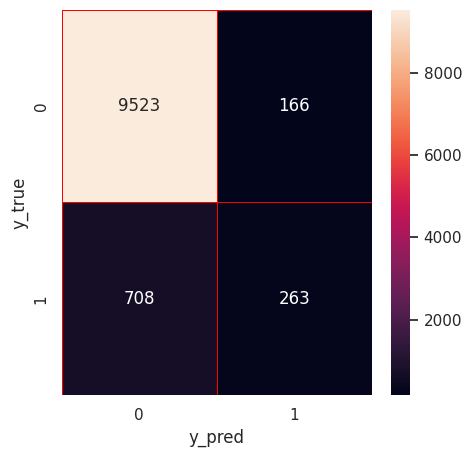

Accuracy score of the  SVC(kernel='linear')  =  0.9098499061913696
              precision    recall  f1-score   support

           0       0.99      0.92      0.95     10440
           1       0.12      0.52      0.19       220

    accuracy                           0.91     10660
   macro avg       0.55      0.72      0.57     10660
weighted avg       0.97      0.91      0.94     10660

[[9584  105]
 [ 856  115]]


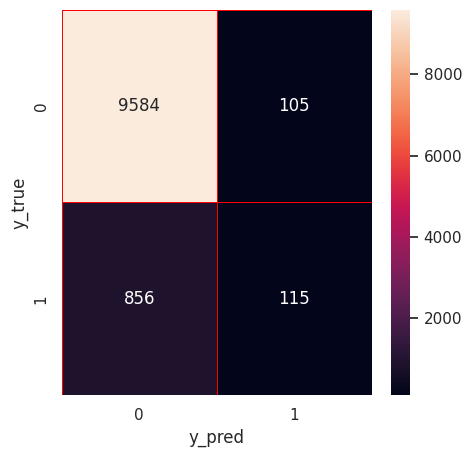

Accuracy score of the  KNeighborsClassifier()  =  0.9097560975609756
              precision    recall  f1-score   support

           0       0.98      0.92      0.95     10331
           1       0.17      0.51      0.26       329

    accuracy                           0.91     10660
   macro avg       0.58      0.72      0.61     10660
weighted avg       0.96      0.91      0.93     10660

[[9529  160]
 [ 802  169]]


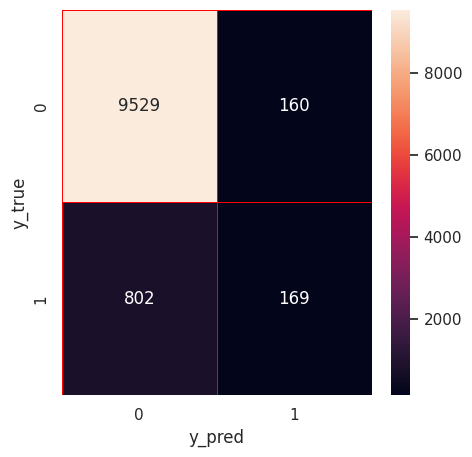

Accuracy score of the  RandomForestClassifier(n_estimators=350)  =  0.922795497185741
              precision    recall  f1-score   support

           0       0.98      0.94      0.96     10128
           1       0.35      0.64      0.45       532

    accuracy                           0.92     10660
   macro avg       0.67      0.79      0.71     10660
weighted avg       0.95      0.92      0.93     10660

[[9497  192]
 [ 631  340]]


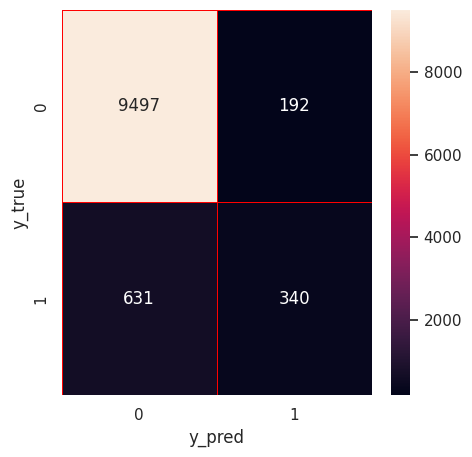

Accuracy score of the  BernoulliNB()  =  0.8941838649155722
              precision    recall  f1-score   support

           0       0.96      0.93      0.94     10011
           1       0.25      0.38      0.30       649

    accuracy                           0.89     10660
   macro avg       0.61      0.65      0.62     10660
weighted avg       0.92      0.89      0.90     10660

[[9286  403]
 [ 725  246]]


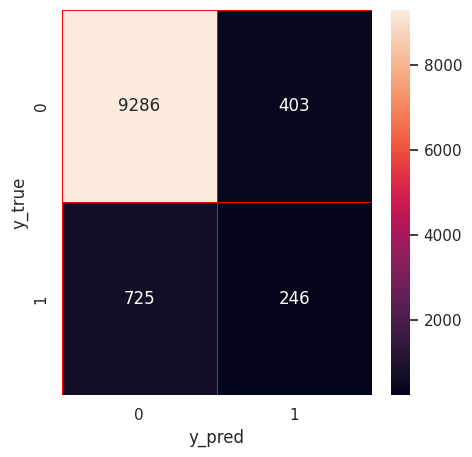

Accuracy score of the  DecisionTreeClassifier(max_depth=3, random_state=0)  =  0.9164165103189493
              precision    recall  f1-score   support

           0       0.98      0.93      0.96     10122
           1       0.32      0.57      0.41       538

    accuracy                           0.92     10660
   macro avg       0.65      0.75      0.68     10660
weighted avg       0.94      0.92      0.93     10660

[[9460  229]
 [ 662  309]]


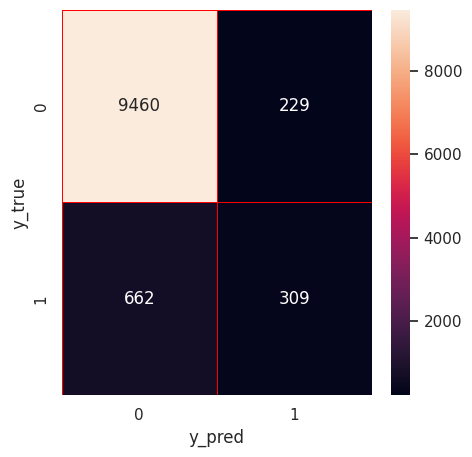

Accuracy score of the  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)  =  0.9220450281425892
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      9940
           1       0.44      0.60      0.51       720

    accuracy                          

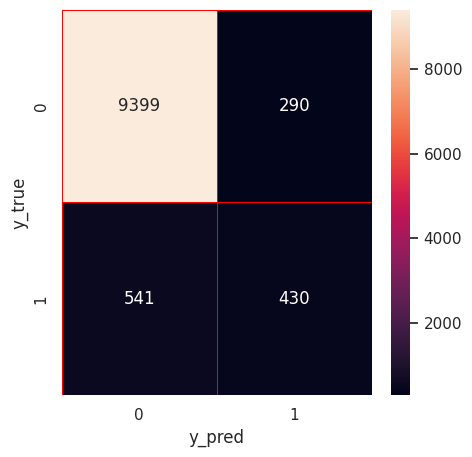

In [ ]:
compare_models_train_test()

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# defining kfold
kfold = KFold(n_splits=10, random_state=1, shuffle = True)

In [ ]:
cv_score_lr = cross_val_score(LogisticRegression(max_iter=1000,random_state=1), X_train, y_train, cv=5)
print(cv_score_lr)

cv_score_lr.mean()

[0.91744841 0.91353971 0.91604128 0.91307067 0.9174355 ]


0.9155071118041427

In [ ]:
cv_score_k = cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=5)
print(cv_score_k)
cv_score_k.mean()

[0.9043152  0.90353346 0.90384615 0.90603502 0.903362  ]


0.9042183665416375

In [ ]:
cv_score_r = cross_val_score(RandomForestClassifier(n_estimators=350),X_train, y_train, cv=5)
print(cv_score_r)
cv_score_r.mean()

[0.91838649 0.91979362 0.91525954 0.91463415 0.91681001]


0.9169767607882371

In [ ]:
cv_score_b = cross_val_score(BernoulliNB(),X_train, y_train, cv=5)
print(cv_score_b)
cv_score_b.mean()

[0.88868043 0.89180738 0.88946216 0.89571607 0.88928851]


0.8909909095843229

In [ ]:
cv_score_d = cross_val_score(DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0),X_train, y_train, cv=5)
print(cv_score_d)
cv_score_d.mean()

[0.91510319 0.9144778  0.91072545 0.91291432 0.91321345]


0.9132868421966231

In [ ]:
cv_score_x = cross_val_score(XGBClassifier(n_estimators = 100),X_train, y_train, cv=5)
print(cv_score_x)
cv_score_x.mean()

[0.92120075 0.92166979 0.91791745 0.91604128 0.92118843]


0.9196035393504834

In [ ]:
cv_score_y = cross_val_score(SVC(kernel='linear'),X_train, y_train, cv=5)
print(cv_score_y)
cv_score_y.mean()

[0.90978737 0.90838024 0.90322076 0.90791119 0.90758405]


0.9073767224530969

In [ ]:
cv_score_lr1 = cross_val_score(LogisticRegression(max_iter=1000,random_state=1),X_train, y_train, cv=10,scoring='accuracy')
print(cv_score_lr1)
cv_score_lr1.mean()

[0.91963727 0.91619762 0.9108818  0.9177611  0.9177611  0.91338336
 0.91213258 0.91525954 0.91932458 0.91492024]


0.9157259199574023

In [ ]:
cv_score_k1 = cross_val_score(KNeighborsClassifier(),  X_train, y_train, cv=10)
print(cv_score_k1)
cv_score_k1.mean()

[0.90994371 0.90181363 0.90275172 0.90462789 0.9043152  0.90556598
 0.90775485 0.90587867 0.90337711 0.9074132 ]


0.9053441967854869

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc_logreg = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of Logistic Regression model : ', acc_logreg )

Accuracy of Logistic Regression model :  91.8


In [ ]:

results = cross_val_score(logreg, X_train, y_train, cv=kfold, scoring='accuracy')
print(results)

[0.91369606 0.90869293 0.90931832 0.9243277  0.91275797 0.91244528
 0.91932458 0.91463415 0.91994997 0.9214889 ]


In [ ]:
results.mean()

0.9156635862694135

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
model = RandomForestClassifier(n_estimators=350)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96     10128
           1       0.35      0.64      0.46       532

    accuracy                           0.92     10660
   macro avg       0.67      0.79      0.71     10660
weighted avg       0.95      0.92      0.93     10660



In [ ]:

parameters = {'n_estimators': [50, 100, 200, 250,300,350], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [5, 10,15], 
              'min_samples_split': [50,100,150,200],
              'min_samples_leaf': [40,50,60]
             }

In [ ]:
# Run the grid search
rand_obj = RandomizedSearchCV(model, parameters,cv=5,verbose=2,scoring="roc_auc",n_iter=5,random_state=0)
rand_obj = rand_obj.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=50, min_samples_split=150, n_estimators=50; total time=   0.7s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=50, min_samples_split=150, n_estimators=50; total time=   0.6s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=50, min_samples_split=150, n_estimators=50; total time=   0.6s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=50, min_samples_split=150, n_estimators=50; total time=   0.6s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=50, min_samples_split=150, n_estimators=50; total time=   0.6s
[CV] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=60, min_samples_split=100, n_estimators=100; total time=   2.2s
[CV] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=60, min_samples_split=100, n_estima

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=50, min_samples_split=200, n_estimators=100; total time=   1.3s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=50, min_samples_split=200, n_estimators=100; total time=   1.7s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=50, min_samples_split=200, n_estimators=100; total time=   1.9s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=50, min_samples_split=200, n_estimators=100; total time=   1.6s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=50, min_samples_split=200, n_estimators=100; total time=   1.3s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=50, min_samples_split=200, n_estimators=100; total time=   1.3s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=50, min_samples_split=200, n_estimators=100; total time=   1.3s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=50, min_samples_split=200, n_estimators=100; total time=   1.3s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=50, min_samples_split=200, n_estimators=100; total time=   1.3s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=50, min_samples_split=200, n_estimators=100; total time=   1.3s


In [ ]:
rf = rand_obj.best_estimator_

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=60,
                       min_samples_split=100)

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
acc_rf = round( metrics.accuracy_score(y_test, y_pred) * 100 , 2 )
print( 'Accuracy of Random Forest model : ', acc_rf )

Accuracy of Random Forest model :  91.06


In [ ]:
def evaluate_model(model, X_test, y_test):
    from sklearn import metrics
    
    y_pred = model.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
   
    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc}

In [ ]:
# Decision Tree Model

from sklearn import tree

# Building Decision Tree model 
dtc = tree.DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
dtc.fit(X_train, y_train)


dtc_eval = evaluate_model(dtc, X_test, y_test)
print('Accuracy:', dtc_eval['acc'])
print('Precision:', dtc_eval['prec'])
print('Recall:', dtc_eval['rec'])
print('F1 Score:', dtc_eval['f1'])
print('Area Under Curve:', dtc_eval['auc'])

Accuracy: 0.9164165103189493
Precision: 0.5743494423791822
Recall: 0.31822863027806386
F1 Score: 0.4095427435387674
Area Under Curve: 0.7778959630077278


In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000,random_state=1)
logreg.fit(X_train,y_train)


lr_eval = evaluate_model(logreg, X_test, y_test)
print('Accuracy:', lr_eval['acc'])
print('Precision:', lr_eval['prec'])
print('Recall:', lr_eval['rec'])
print('F1 Score:', lr_eval['f1'])
print('Area Under Curve:', lr_eval['auc'])

Accuracy: 0.9180112570356472
Precision: 0.6130536130536131
Recall: 0.2708547888774459
F1 Score: 0.37571428571428567
Area Under Curve: 0.9105184630260631


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=350)
rf.fit(X_train, y_train)

rf_eval = evaluate_model(rf, X_test, y_test)

print('Accuracy:', rf_eval['acc'])
print('Precision:', rf_eval['prec'])
print('Recall:', rf_eval['rec'])
print('F1 Score:', rf_eval['f1'])
print('Area Under Curve:', rf_eval['auc'])

Accuracy: 0.9218574108818012
Precision: 0.6277777777777778
Recall: 0.349124613800206
F1 Score: 0.44870946393117145
Area Under Curve: 0.9384082345071796


In [ ]:
feature_scores = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

duration               0.305363
balance                0.108251
age                    0.100163
day                    0.091975
campaign               0.043286
pdays                  0.028434
poutcome_success       0.024094
housing_yes            0.015415
previous               0.015130
month_oct              0.014724
education_secondary    0.014046
marital_married        0.012884
contact_unknown        0.012680
education_tertiary     0.012191
month_jun              0.012032
job_technician         0.012021
job_management         0.011696
month_mar              0.011028
loan_yes               0.010595
marital_single         0.010548
month_may              0.010134
month_aug              0.010063
job_blue-collar        0.009787
month_jul              0.009142
month_nov              0.009134
month_feb              0.008149
job_services           0.007561
contact_telephone      0.007247
month_sep              0.006212
month_dec              0.005797
education_unknown      0.005578
job_reti

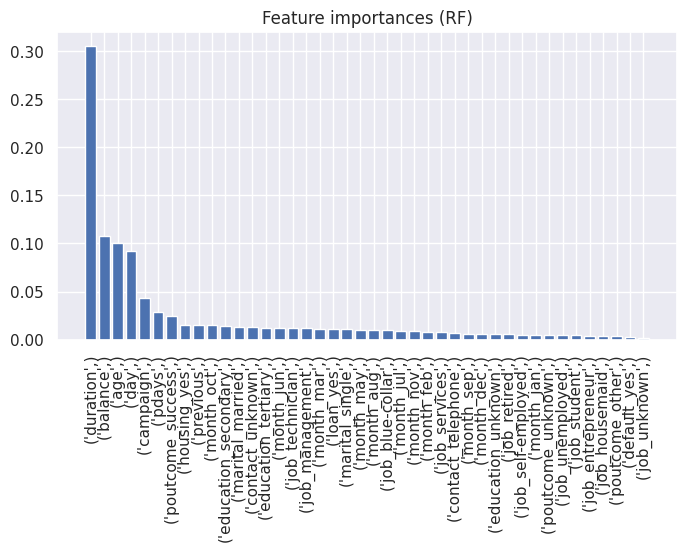

In [ ]:
headers = ["name", "score"]
values = sorted(zip(X_train.columns, rf.feature_importances_), key=lambda x: x[1] * -1)
rf_feature_importances = pd.DataFrame(values, columns = headers)

x_pos = np.arange(0, len(rf_feature_importances ))
plt.bar(x_pos,rf_feature_importances['score'])
plt.xticks(x_pos,rf_feature_importances['name'])
plt.xticks(rotation=90)
plt.title('Feature importances (RF)')

plt.show()

In [ ]:
from sklearn.naive_bayes import BernoulliNB
nb = BernoulliNB()
nb.fit(X_train, y_train)
nb_eval = evaluate_model(nb, X_test, y_test)
print('Accuracy:', nb_eval['acc'])
print('Precision:', nb_eval['prec'])
print('Recall:', nb_eval['rec'])
print('F1 Score:', nb_eval['f1'])
print('Area Under Curve:', nb_eval['auc'])

Accuracy: 0.8941838649155722
Precision: 0.3790446841294299
Recall: 0.2533470648815654
F1 Score: 0.3037037037037037
Area Under Curve: 0.7015288234430648


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_eval = evaluate_model(knn, X_test, y_test)
print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Area Under Curve:', knn_eval['auc'])

Accuracy: 0.9097560975609756
Precision: 0.513677811550152
Recall: 0.17404737384140062
F1 Score: 0.26
Area Under Curve: 0.7290540654732947


In [ ]:
from sklearn.svm import SVC

sv=SVC(kernel='linear',probability=True)
sv.fit(X_train, y_train)
sv_eval = evaluate_model(sv, X_test, y_test)
print('Accuracy:', sv_eval['acc'])
print('Precision:', sv_eval['prec'])
print('Recall:', sv_eval['rec'])
print('F1 Score:', sv_eval['f1'])
print('Area Under Curve:', sv_eval['auc'])

Accuracy: 0.9098499061913696
Precision: 0.5227272727272727
Recall: 0.1184346035015448
F1 Score: 0.1931150293870697
Area Under Curve: 0.9106328335433845


In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

xgb=XGBClassifier(n_estimators = 100)
xgb.fit(X_train, y_train)
xgb_eval = evaluate_model(xgb, X_test, y_test)
print('Accuracy:', xgb_eval['acc'])
print('Precision:', xgb_eval['prec'])
print('Recall:', xgb_eval['rec'])
print('F1 Score:', xgb_eval['f1'])
print('Area Under Curve:', xgb_eval['auc'])

Accuracy: 0.9220450281425892
Precision: 0.5972222222222222
Recall: 0.4428424304840371
F1 Score: 0.5085748078060319
Area Under Curve: 0.9380941938999061


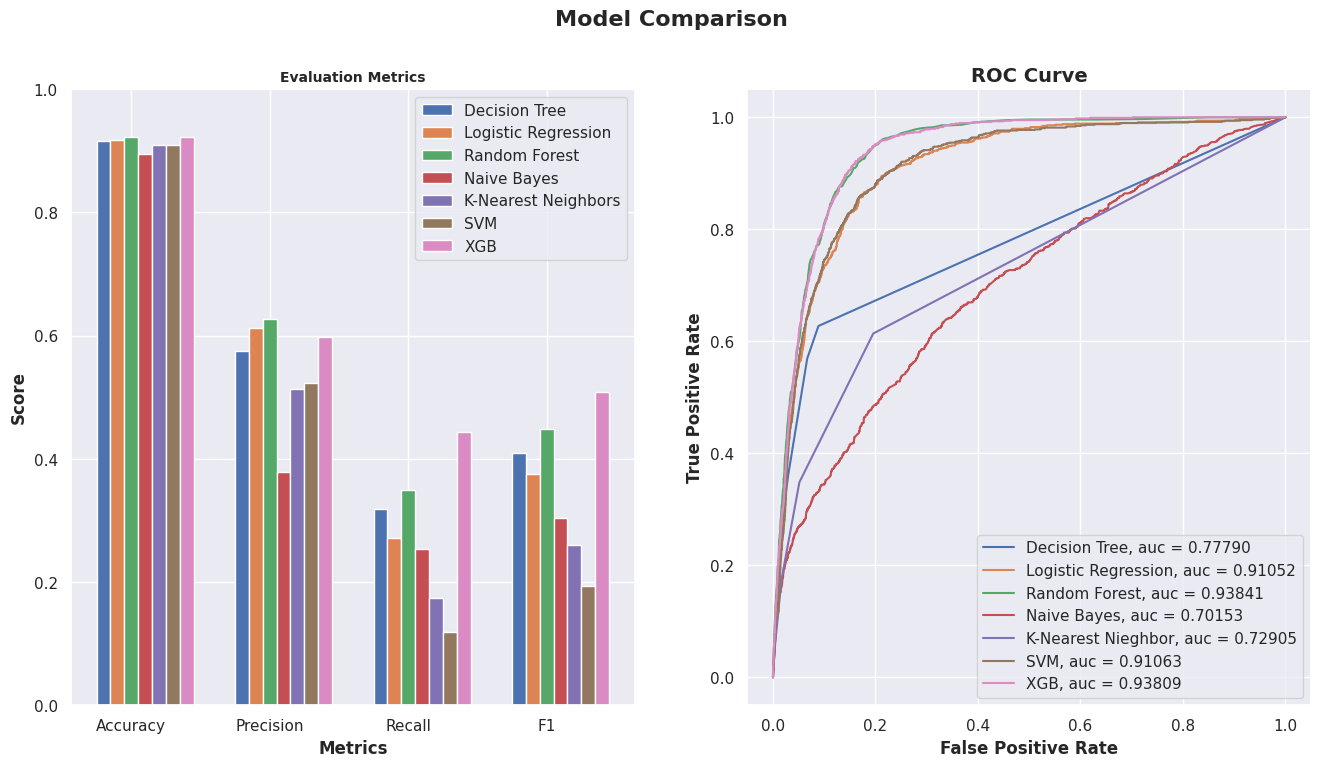

In [ ]:

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(8)
fig.set_figwidth(16)
fig.set_facecolor('white')


barWidth = 0.1
dtc_score = [dtc_eval['acc'], dtc_eval['prec'], dtc_eval['rec'], dtc_eval['f1']]
lr_score = [lr_eval['acc'], lr_eval['prec'], lr_eval['rec'], lr_eval['f1']]
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1']]
nb_score = [nb_eval['acc'], nb_eval['prec'], nb_eval['rec'], nb_eval['f1']]
knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1']]
sv_score = [sv_eval['acc'], sv_eval['prec'], sv_eval['rec'], sv_eval['f1']]
xgb_score = [xgb_eval['acc'], xgb_eval['prec'], xgb_eval['rec'], xgb_eval['f1']]

r1 = np.arange(len(dtc_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]

## Make the plot
ax1.bar(r1, dtc_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r2, lr_score, width=barWidth, edgecolor='white', label='Logistic Regression')
ax1.bar(r3, rf_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r4, nb_score, width=barWidth, edgecolor='white', label='Naive Bayes')
ax1.bar(r5, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')
ax1.bar(r6, sv_score, width=barWidth, edgecolor='white', label='SVM')
ax1.bar(r7, xgb_score, width=barWidth, edgecolor='white', label='XGB')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1']
ax1.set_xticks([r + (barWidth * 2) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

ax1.set_title('Evaluation Metrics', fontsize=10, fontweight='bold')
ax1.legend()


ax2.plot(dtc_eval['fpr'], dtc_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(dtc_eval['auc']))
ax2.plot(lr_eval['fpr'], lr_eval['tpr'], label='Logistic Regression, auc = {:0.5f}'.format(lr_eval['auc']))
ax2.plot(rf_eval['fpr'], rf_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(rf_eval['auc']))
ax2.plot(nb_eval['fpr'], nb_eval['tpr'], label='Naive Bayes, auc = {:0.5f}'.format(nb_eval['auc']))
ax2.plot(knn_eval['fpr'], knn_eval['tpr'], label='K-Nearest Nieghbor, auc = {:0.5f}'.format(knn_eval['auc']))
ax2.plot(sv_eval['fpr'], sv_eval['tpr'], label='SVM, auc = {:0.5f}'.format(sv_eval['auc']))
ax2.plot(xgb_eval['fpr'], xgb_eval['tpr'], label='XGB, auc = {:0.5f}'.format(xgb_eval['auc']))

ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')


ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()